In [3]:
df_customer_transactions = pd.read_csv('customer_transactions.csv')
df_customer_transactions.head()
#df['cosmos_customer_id'].unique().shape
#df_customer_transactions[df_customer_transactions['cosmos_customer_id'] == 10058]
#df_customer_transactions.shape

,cosmos_customer_id,order_number,quantity,transaction_amount,order_date,product_skuid
0,860051,027200055000007415147400001,1,10.0,06/08/2004,147249
1,860051,027200055000007415147400001,1,10.0,06/08/2004,147252
2,847582,027350055000008578150800001,1,15.0,06/23/2004,146622
3,847582,027350055000008578150800001,1,12.0,06/23/2004,146660
4,1221515,027390055000008630083000001,1,22.5,06/26/2004,141909


In [4]:
#create invoice month and year
df_customer_transactions['InvoiceDate'] = pd.to_datetime(df_customer_transactions['order_date']) #dt.date
df_customer_transactions['Invoice_month'] = df_customer_transactions['InvoiceDate'].map(lambda x: x.month)
df_customer_transactions['Invoice_Year'] = df_customer_transactions['InvoiceDate'].map(lambda x: x.year)

In [7]:
print(df_customer_transactions.shape)
df_customer_transactions.head(10)

(193183, 10)


,cosmos_customer_id,order_number,quantity,transaction_amount,order_date,product_skuid,InvoiceDate,Invoice_month,Invoice_Year,Sales
0,860051,027200055000007415147400001,1,10.0,06/08/2004,147249,2004-06-08,6,2004,10.0
1,860051,027200055000007415147400001,1,10.0,06/08/2004,147252,2004-06-08,6,2004,10.0
2,847582,027350055000008578150800001,1,15.0,06/23/2004,146622,2004-06-23,6,2004,15.0
3,847582,027350055000008578150800001,1,12.0,06/23/2004,146660,2004-06-23,6,2004,12.0
4,1221515,027390055000008630083000001,1,22.5,06/26/2004,141909,2004-06-26,6,2004,22.5
5,1816917,027420055000009013030100001,1,18.0,07/01/2004,135914,2004-07-01,7,2004,18.0
6,207367,027480055000007489395600001,1,12.0,07/06/2004,130735,2004-07-06,7,2004,12.0
7,1928152,027490055000008432131900001,1,30.0,07/07/2004,142077,2004-07-07,7,2004,30.0
8,1619711,027530055000009063070600001,1,24.0,07/09/2004,141590,2004-07-09,7,2004,24.0
9,1619711,027530055000009063070600001,1,18.0,07/09/2004,146480,2004-07-09,7,2004,18.0


In [8]:
df_customer_transactions['Sales'] = df_customer_transactions['transaction_amount']
cols_of_interest = ['cosmos_customer_id', 'InvoiceDate', 'Sales','Invoice_month','Invoice_Year']

df_customer_trans_summary_by_month_year = df_customer_transactions[cols_of_interest]

In [9]:
print('No of Customers',df_customer_trans_summary_by_month_year['cosmos_customer_id'].nunique())
df_customer_trans_summary_by_month_year.head(10)

No of Customers 115860


,cosmos_customer_id,InvoiceDate,Sales,Invoice_month,Invoice_Year
0,860051,2004-06-08,10.0,6,2004
1,860051,2004-06-08,10.0,6,2004
2,847582,2004-06-23,15.0,6,2004
3,847582,2004-06-23,12.0,6,2004
4,1221515,2004-06-26,22.5,6,2004
5,1816917,2004-07-01,18.0,7,2004
6,207367,2004-07-06,12.0,7,2004
7,1928152,2004-07-07,30.0,7,2004
8,1619711,2004-07-09,24.0,7,2004
9,1619711,2004-07-09,18.0,7,2004


In [10]:
#df_customer_transactions.head() 
print(df_customer_transactions['InvoiceDate'].min(), df_customer_transactions['InvoiceDate'].max())
training_end_period = df_customer_transactions['InvoiceDate'].max() #pd.to_datetime('2017-06-08')
print('End period' ,training_end_period)

2004-06-08 00:00:00 2018-08-04 00:00:00
End period 2018-08-04 00:00:00


In [ ]:
#compute RFM Manually
df_customer_train_transactions = df_customer_transactions[df_customer_transactions.InvoiceDate <= training_end_period]
df_customer_train_transactions.shape
df_customer_train_transactions = df_customer_train_transactions.sort_values(['InvoiceDate'], ascending=True).groupby(['cosmos_customer_id', 'InvoiceDate'], as_index=False)['Sales'].sum()
df_customer_transactions_rfm = df_customer_train_transactions.groupby(['cosmos_customer_id']).apply(lambda x: compute_rfm(x, training_end_period))
df_customer_transactions_rfm = df_customer_transactions_rfm[['cosmos_customer_id', 'recency', 'frequency', 'T', 'monetary_value']].groupby(['cosmos_customer_id']).first()
df_customer_transactions_rfm.shape
df_customer_transactions_rfm.head()

In [12]:
print(df_model_bgf_rfm_customer_transactions_rfm.shape)
df_model_bgf_rfm_customer_transactions_rfm.head()
#df_model_bgf_rfm_customer_transactions_rfm[df_model_bgf_rfm_customer_transactions_rfm['monetary_value'] > 0]

(115860, 4)


,frequency,recency,T,monetary_value
cosmos_customer_id,,,,
10001,0.0,0.0,1161.0,0.0
10058,3.0,395.0,428.0,20.0
10066,0.0,0.0,71.0,0.0
10091,0.0,0.0,10.0,0.0
10095,1.0,196.0,449.0,60.0


In [ ]:
# copy manual computed rfm with bgf package
#df_model_bgf_rfm_customer_transactions_rfm = df_customer_transactions_rfm

count    115860.000000
mean          0.242871
std           0.944140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          48.000000
Name: frequency, dtype: float64
0.86359399275


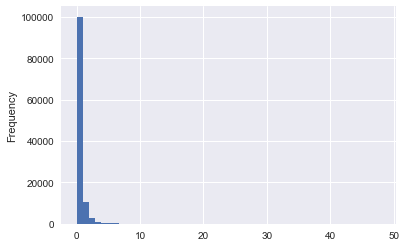

In [13]:
# Frequency distribution of customer purchases
df_model_bgf_rfm_customer_transactions_rfm['frequency'].plot(kind='hist', bins=50)
print(df_model_bgf_rfm_customer_transactions_rfm['frequency'].describe())
print(sum(df_model_bgf_rfm_customer_transactions_rfm['frequency'] == 0)/float(len(df_model_bgf_rfm_customer_transactions_rfm)))

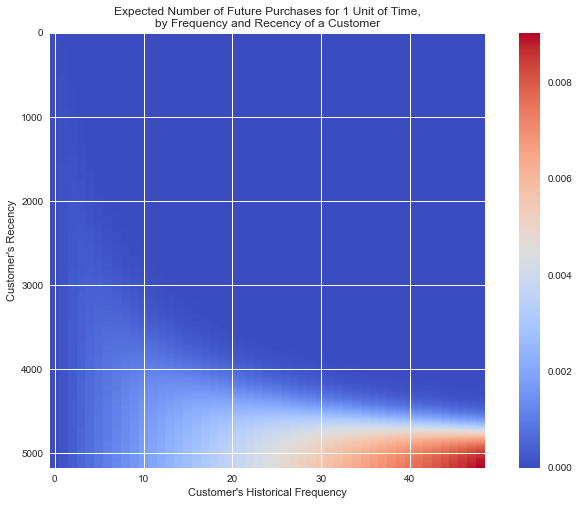

In [15]:
# Expected number of Future Purchases based on frequency and recency
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(model_bgf_rfm)
# best customer is who made 40 purchases (bottom right)
# customers who purchased a lot but not recently have probably gone.(top right)
# Customers who have purchased a lot and purchased recently will likely be the best customers in the future. 

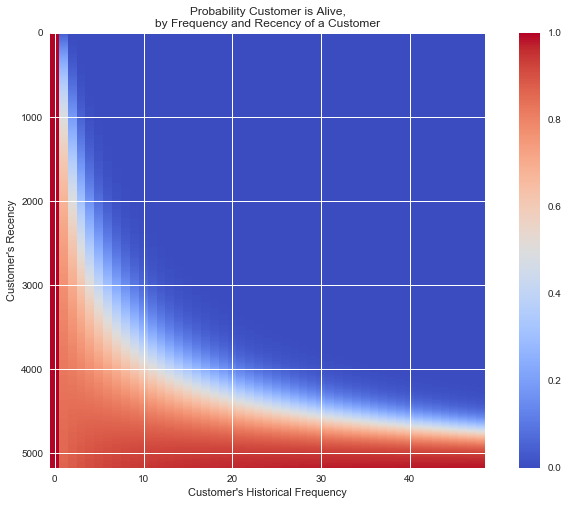

In [16]:
#Probability that a customer is Alive by Frequency and Recency.
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(model_bgf_rfm)

#Customers who have purchased recently are almost surely “alive”.
#Customers who have purchased a lot but not recently, are likely to have dropped out.
#And the more they bought in the past, the more likely they have dropped out. They are represented in the upper-right.

In [17]:
#We are ranking customers from “highest expected purchases in the next period” to lowest.
#Models expose a method that will predict a customer’s expected purchases in the next period using their history.
#The predicted_purchases column represents their expected number of purchases
#Top 5 customers that the model expects them to make purchases in the next day
t = 1

,frequency,recency,T,monetary_value,predicted_purchases
cosmos_customer_id,,,,,
1821196,15.0,48.0,52.0,65.900000,0.101545
778405,16.0,47.0,52.0,71.562500,0.107533
1504907,20.0,84.0,86.0,65.100000,0.111070
2006642,17.0,52.0,54.0,64.029412,0.115109
402567,24.0,89.0,91.0,81.943750,0.129917


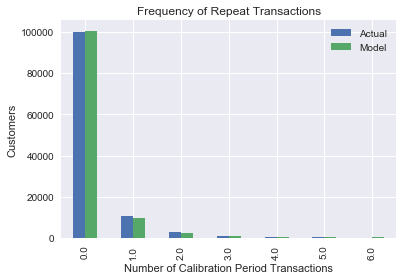

In [18]:
#Frequency of Repeat Transactions.
plot_period_transactions(model_bgf_rfm)

In [19]:
print(df_customer_transactions['InvoiceDate'].min(), df_customer_transactions['InvoiceDate'].max())

2004-06-08 00:00:00 2018-08-04 00:00:00


In [20]:
observation_period = df_customer_transactions['InvoiceDate'].max()
calibration_period = observation_period+ relativedelta(years=-2)
print(observation_period,calibration_period)
summary_cal_holdout = calibration_and_holdout_data(df_customer_transactions, 'cosmos_customer_id', 'InvoiceDate',
                                        calibration_period_end=calibration_period,#'2017-06-08',
                                        observation_period_end=observation_period)#'2018-08-04' )   
summary_cal_holdout.head()

2018-08-04 00:00:00 2016-08-04 00:00:00


,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
cosmos_customer_id,,,,,
10001,0.0,0.0,431.0,0.0,730
10185,0.0,0.0,1594.0,0.0,730
10255,0.0,0.0,185.0,0.0,730
10441,0.0,0.0,443.0,0.0,730
10549,0.0,0.0,580.0,2.0,730


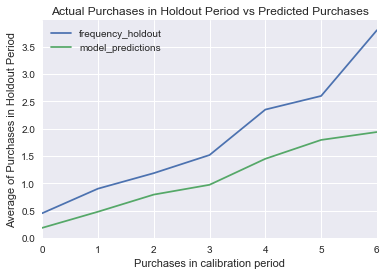

In [21]:
model_bgf_rfm.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])

#Model Predictions in Training vs Test Period.
plot_calibration_purchases_vs_holdout_purchases(model_bgf_rfm, summary_cal_holdout)

In [22]:
#Predict Customer Transaction in ‘N’ days.
t = 10 #predict purchases in 10 periods
individual = df_model_bgf_rfm_customer_transactions_rfm.loc[778405] # filter by customer id 12840
#print(df_model_bgf_rfm_customer_transactions_rfm.head())
#print(individual)
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
model_bgf_rfm.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.41818790320629129

In [ ]:
#df_model_bgf_rfm_customer_transactions_rfm.loc[10185]

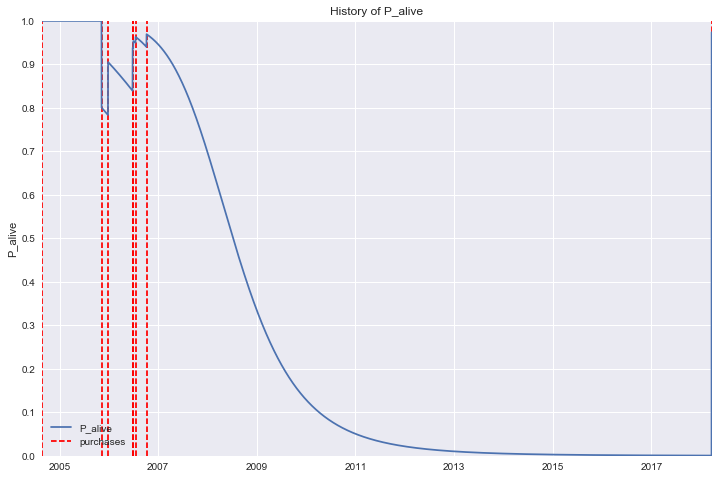

In [47]:
#best customer’s transactions history and see the probability of being alive
fig = plt.figure(figsize=(12,8))
id = 17636
days_since_birth = 365
sp_trans = df_customer_transactions.loc[df_customer_transactions['cosmos_customer_id'] == id]
plot_history_alive(model_bgf_rfm, days_since_birth, sp_trans, 'InvoiceDate')

In [24]:
#We are only estimating the customers who had at least one repeat purchase with us. 
returning_customers_summary = df_model_bgf_rfm_customer_transactions_rfm[df_model_bgf_rfm_customer_transactions_rfm['frequency']>0]
returning_customers_summary = returning_customers_summary[returning_customers_summary['monetary_value']>0]
#returning_customers_summary.head()

In [ ]:
returning_customers_summary[['monetary_value', 'frequency']].corr()
#returning_customers_summary['monetary_value']

In [ ]:
print(model_ggf_return_customers.conditional_expected_average_profit(
        df_model_bgf_rfm_customer_transactions_rfm['frequency'],
        df_model_bgf_rfm_customer_transactions_rfm['monetary_value']
    ).head(10))

In [28]:
model_bgf_rfm.fit(df_model_bgf_rfm_customer_transactions_rfm['frequency'], df_model_bgf_rfm_customer_transactions_rfm['recency'], df_model_bgf_rfm_customer_transactions_rfm['T'])
#Predict CLV value for each Sephora Customers for ‘N’ Period.
cosmos_customer_cltv_ps = model_ggf_return_customers.customer_lifetime_value(
    model_bgf_rfm, #the model to use to predict the number of future transactions
    df_model_bgf_rfm_customer_transactions_rfm['frequency'],
    df_model_bgf_rfm_customer_transactions_rfm['recency'],
    df_model_bgf_rfm_customer_transactions_rfm['T'],
    df_model_bgf_rfm_customer_transactions_rfm['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
)

In [29]:
cosmos_customer_cltv_df =  pd.DataFrame({'cosmos_customer_id':cosmos_customer_cltv_ps.index, 'CLTV':cosmos_customer_cltv_ps.values})
cosmos_customer_cltv_df = cosmos_customer_cltv_df[['cosmos_customer_id','CLTV']]
cosmos_customer_cltv_df = cosmos_customer_cltv_df.dropna()  
cosmos_customer_cltv_df.head(10)
#df_model_bgf_rfm_customer_transactions_rfm.head()

,cosmos_customer_id,CLTV
0,10001,2.254308
1,10058,53.995204
4,10095,22.512259
11,10185,1.182158
16,10255,2.790510
29,10441,2.233386
33,10499,79.431534
34,10501,46.373476
36,10549,27.558122
39,10677,78.055166


In [33]:
####compute first year monthly sales
df_customer_trans_summary_by_month_year = df_customer_transactions[cols_of_interest]

df_customer_trans_summary_by_month_year.head()
customer_first_yr = df_customer_trans_summary_by_month_year.groupby(by=['cosmos_customer_id'], as_index=False)['Invoice_Year'].min()
df_customer_transactions_first_yr = pd.merge(df_customer_transactions, customer_first_yr,  left_on=['cosmos_customer_id','Invoice_Year'], right_on = ['cosmos_customer_id','Invoice_Year'])
df_customer_transactions_yearly_monthly_sales = df_customer_transactions_first_yr.groupby(by=['cosmos_customer_id','Invoice_Year','Invoice_month'],as_index=False).agg({'Sales': 'sum'})
#df_bymonth_sales.head()
df_customer_transactions_1st_N_monthly_sales = compute_monthly_sales(df_customer_transactions_yearly_monthly_sales)

print(df_customer_transactions_1st_N_monthly_sales.head())

   cosmos_customer_id  Invoice_Year  1_Month_Sale_Total  2_Month_Sale_Total  \
0               10001          2015                23.0                 0.0   
1               10058          2017                10.0                50.0   
2               10066          2018                38.0                 0.0   
3               10091          2018                25.0                 0.0   
4               10095          2017                48.0                60.0   

   3_Month_Sale_Total  4_Month_Sale_Total  5_Month_Sale_Total  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   6_Month_Sale_Total  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4             

In [34]:
#print(row['cosmos_customer_id'])
#df_bymonth_sales[df_bymonth_sales['cosmos_customer_id'] == 10058]
#df_customer_transactions_1st_N_monthly_sales[df_customer_transactions_1st_N_monthly_sales['6_Month_Sale_Total'] > 0]
#df_customer_transactions_1st_N_monthly_sales[df_customer_transactions_1st_N_monthly_sales['cosmos_customer_id'] == 119128]
#import sys
#sys.version
with open('clv_bymonth_sales_summary.pkl', 'wb') as f:
    pickle.dump(df_customer_transactions_1st_N_monthly_sales, f)

In [35]:
df_customer_transactions_1st_N_monthly_sales = pickle.load(open('clv_bymonth_sales_summary.pkl', 'rb'))

df_customer_transactions_1st_N_monthly_sales.shape
df_customer_transactions_1st_N_monthly_sales['cosmos_customer_id'].unique().shape
print(df_customer_transactions_yearly_monthly_sales[df_customer_transactions_yearly_monthly_sales['cosmos_customer_id'] == 10058])
df_customer_transactions_1st_N_monthly_sales.head()

   cosmos_customer_id  Invoice_Year  Invoice_month  Sales
1               10058          2017              6   10.0
2               10058          2017              7   50.0


,cosmos_customer_id,Invoice_Year,1_Month_Sale_Total,2_Month_Sale_Total,3_Month_Sale_Total,4_Month_Sale_Total,5_Month_Sale_Total,6_Month_Sale_Total
0,10001,2015,23.0,0.0,0.0,0.0,0.0,0.0
1,10058,2017,10.0,50.0,0.0,0.0,0.0,0.0
2,10066,2018,38.0,0.0,0.0,0.0,0.0,0.0
3,10091,2018,25.0,0.0,0.0,0.0,0.0,0.0
4,10095,2017,48.0,60.0,0.0,0.0,0.0,0.0


In [36]:
df_model_bgf_rfm_customer_transactions_rfm['cosmos_customer_id'] = df_model_bgf_rfm_customer_transactions_rfm.index 
df_temp_cltv_rfm = pd.merge(cosmos_customer_cltv_df, df_model_bgf_rfm_customer_transactions_rfm, on = 'cosmos_customer_id')
df_clv_sales_summary = pd.merge(df_temp_cltv_rfm, df_customer_transactions_1st_N_monthly_sales, on = 'cosmos_customer_id')
df_clv_sales_summary.head()

,cosmos_customer_id,CLTV,frequency,recency,T,monetary_value,predicted_purchases,Invoice_Year,1_Month_Sale_Total,2_Month_Sale_Total,3_Month_Sale_Total,4_Month_Sale_Total,5_Month_Sale_Total,6_Month_Sale_Total
0,10001,2.254308,0.0,0.0,1161.0,0.0,0.000165,2015,23.0,0.0,0.0,0.0,0.0,0.0
1,10058,53.995204,3.0,395.0,428.0,20.0,0.005449,2017,10.0,50.0,0.0,0.0,0.0,0.0
2,10095,22.512259,1.0,196.0,449.0,60.0,0.001680,2017,48.0,60.0,0.0,0.0,0.0,0.0
3,10185,1.182158,0.0,0.0,2324.0,0.0,0.000086,2012,20.0,0.0,0.0,0.0,0.0,0.0
4,10255,2.790510,0.0,0.0,915.0,0.0,0.000206,2016,25.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_clv_sales_summary_subset = df_clv_sales_summary[df_clv_sales_summary['3_Month_Sale_Total'] > 0 ]
print(df_clv_sales_summary_subset.shape)
df_clv_sales_summary_subset.head() 

(1154, 14)


,cosmos_customer_id,CLTV,frequency,recency,T,monetary_value,predicted_purchases,Invoice_Year,1_Month_Sale_Total,2_Month_Sale_Total,3_Month_Sale_Total,4_Month_Sale_Total,5_Month_Sale_Total,6_Month_Sale_Total
21,11897,2.989802,2.0,294.0,1649.0,13.475000,0.000270,2014,27.00,5.95,21.00,0.0,0.0,0.0
95,19896,169.010492,3.0,85.0,106.0,32.500000,0.014185,2018,63.45,21.00,25.00,51.5,0.0,0.0
109,20868,181.621854,5.0,474.0,558.0,88.400000,0.006808,2017,195.00,130.00,130.00,65.0,65.0,0.0
148,24072,3.658295,2.0,92.0,900.0,12.950000,0.000338,2016,32.00,19.95,5.95,0.0,0.0,0.0
160,25321,86.046753,6.0,481.0,484.0,19.333333,0.010015,2017,14.00,30.00,14.00,14.0,28.0,0.0


In [38]:
X = df_clv_sales_summary_subset.iloc[:, 8:14]
Y = df_clv_sales_summary_subset.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X.head()

,1_Month_Sale_Total,2_Month_Sale_Total,3_Month_Sale_Total,4_Month_Sale_Total,5_Month_Sale_Total,6_Month_Sale_Total
21,27.00,5.95,21.00,0.0,0.0,0.0
95,63.45,21.00,25.00,51.5,0.0,0.0
109,195.00,130.00,130.00,65.0,65.0,0.0
148,32.00,19.95,5.95,0.0,0.0,0.0
160,14.00,30.00,14.00,14.0,28.0,0.0


In [39]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
accuracy = regression_model.score(X_test, y_test)
print('Accuracy' , accuracy * 100)
#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

Accuracy 87.5323994166


In [41]:
y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

print(math.sqrt(regression_model_mse))

112.04657942691306


In [42]:
#regression_model.predict([[358.00,279.50,442.9,625.00,430.0,0]])
#regression_model.predict([[5.95,30.00,23.0,41.95,35.0,35.0]])
regression_model.predict([[195.00,130.00,130.00,65.0,65.0,0.0]])

array([ 548.71133032])

# Compute RFM Segmentation

In [345]:
df_model_bgf_rfm_customer_transactions_rfm.head()

,frequency,recency,T,monetary_value,predicted_purchases,cosmos_customer_id
cosmos_customer_id,,,,,,
10001,0.0,0.0,1161.0,0.0,0.000151,10001
10058,3.0,395.0,428.0,20.0,0.003756,10058
10066,0.0,0.0,71.0,0.0,0.000569,10066
10091,0.0,0.0,10.0,0.0,0.000674,10091
10095,1.0,196.0,449.0,60.0,0.001064,10095


In [347]:
quantiles = df_model_bgf_rfm_customer_transactions_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,frequency,recency,T,monetary_value,predicted_purchases,cosmos_customer_id
0.25,0.0,0.0,35.0,0.0,0.000541,513238.25
0.50,0.0,0.0,68.0,0.0,0.000592,1014877.50
0.75,0.0,0.0,100.0,0.0,0.000654,1512311.75


In [348]:
rfm_segmentation = df_model_bgf_rfm_customer_transactions_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

In [349]:
rfm_segmentation.head()

,frequency,recency,T,monetary_value,predicted_purchases,cosmos_customer_id,R_Quartile,F_Quartile,M_Quartile
cosmos_customer_id,,,,,,,,,
10001,0.0,0.0,1161.0,0.0,0.000151,10001,4,1,1
10058,3.0,395.0,428.0,20.0,0.003756,10058,1,4,4
10066,0.0,0.0,71.0,0.0,0.000569,10066,4,1,1
10091,0.0,0.0,10.0,0.0,0.000674,10091,4,1,1
10095,1.0,196.0,449.0,60.0,0.001064,10095,1,4,4


In [350]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

In [351]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  0
Loyal Customers:  15804
Big Spenders:  15804
Almost Lost:  0
Lost Customers:  15804
Lost Cheap Customers:  0


In [356]:
# big spenders
rfm_segmentation[rfm_segmentation['M_Quartile']==4].sort_values('monetary_value', ascending=False).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,cosmos_customer_id,R_Quartile,F_Quartile,M_Quartile,RFMScore
cosmos_customer_id,,,,,,,,,,
1619025,1.0,4.0,78.0,3460.000,0.002203,1619025,1,4,4,144
263327,1.0,3.0,106.0,714.850,0.002008,263327,1,4,4,144
1931977,1.0,902.0,975.0,709.950,0.000712,1931977,1,4,4,144
190467,1.0,114.0,359.0,545.000,0.001181,190467,1,4,4,144
1367188,1.0,787.0,892.0,542.640,0.000753,1367188,1,4,4,144
722054,1.0,76.0,551.0,515.000,0.000782,722054,1,4,4,144
1514082,1.0,10.0,71.0,510.000,0.002270,1514082,1,4,4,144
1875362,2.0,867.0,882.0,488.495,0.001563,1875362,1,4,4,144
300535,1.0,13.0,53.0,478.000,0.002422,300535,1,4,4,144


In [358]:
# lost customers
rfm_segmentation[rfm_segmentation['RFMScore']=='144'].sort_values('monetary_value', ascending=False).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,cosmos_customer_id,R_Quartile,F_Quartile,M_Quartile,RFMScore
cosmos_customer_id,,,,,,,,,,
1619025,1.0,4.0,78.0,3460.000,0.002203,1619025,1,4,4,144
263327,1.0,3.0,106.0,714.850,0.002008,263327,1,4,4,144
1931977,1.0,902.0,975.0,709.950,0.000712,1931977,1,4,4,144
190467,1.0,114.0,359.0,545.000,0.001181,190467,1,4,4,144
1367188,1.0,787.0,892.0,542.640,0.000753,1367188,1,4,4,144
722054,1.0,76.0,551.0,515.000,0.000782,722054,1,4,4,144
1514082,1.0,10.0,71.0,510.000,0.002270,1514082,1,4,4,144
1875362,2.0,867.0,882.0,488.495,0.001563,1875362,1,4,4,144
300535,1.0,13.0,53.0,478.000,0.002422,300535,1,4,4,144
